### CSE-221710304046-RAVI NISHITA

### problem statement
To uncover the factors that lead to **Employee Attrition** and to predict the number of employees who left and who stayed in the company based on the feature  column Attrition using the following Machine Learning Algorithms 
- RandomForest
- LogisticRegression 
- Naive bayes


In [1]:
## importing the packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## loading the dataset
df = pd.read_csv('Employee_Attrition.csv') 
df 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
## checking the shape
df.shape

(1470, 35)

In [4]:
#Getting the column data types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
## getting the description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [6]:
#checking for null values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# checking for null values
df.isnull().values.any()

False

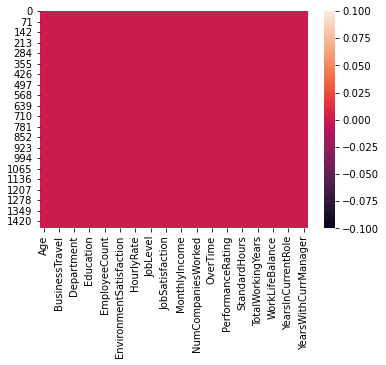

In [8]:
## visual representation of null values using heatmap
sns.heatmap(df.isna())

as it is visible from the heatmap there are no null values in the dataset

In [9]:
## checking for duplicate values
df.duplicated().sum()

0

In [10]:
## checking for unique values
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [11]:
df['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [12]:
df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [13]:
#Get a count of the number of employee attrition employees who stayed (no) and who left (yes)
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

### Visualization

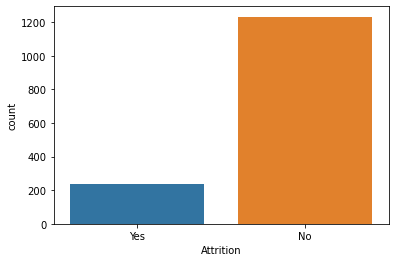

In [14]:
#Visualizing this count 
sns.countplot(df['Attrition'])

Text(0.5, 1.0, 'age vs attrition')

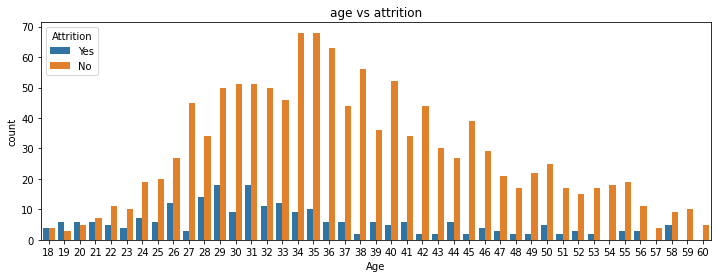

In [15]:
#Showing  the number of employees that left and stayed by age
fig_dims = (12, 4)
fig= plt.subplots(figsize=fig_dims)
sns.countplot(x='Age', hue='Attrition', data = df)
plt.title("age vs attrition")

This graph shows the relation between attrition and the count of employees with respect to age  

### histogram

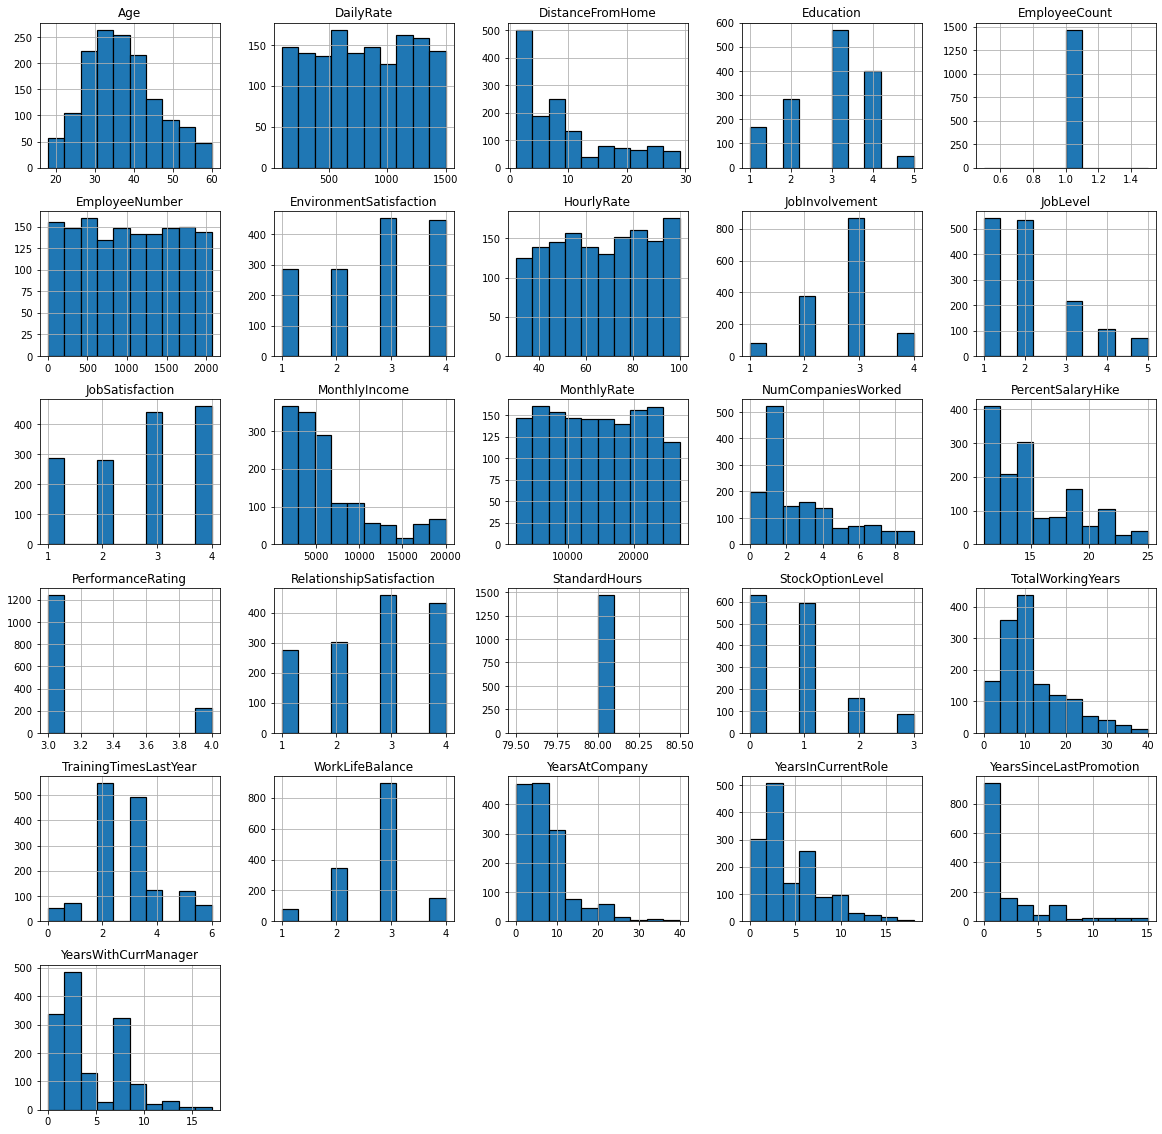

In [16]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

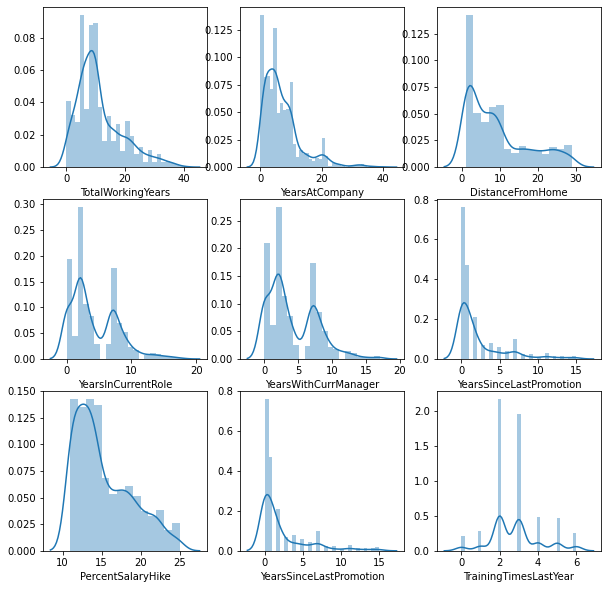

In [17]:
fig,ax = plt.subplots(3,3, figsize=(10,10))              
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df['YearsAtCompany'], ax = ax[0,1]) 
sns.distplot(df['DistanceFromHome'], ax = ax[0,2]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[1,0]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[1,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[1,2]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[2,0]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[2,1]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[2,2]) 
plt.show()

### Relation between Employee's qualification and Attrition

Text(0.5, 1.0, 'education')

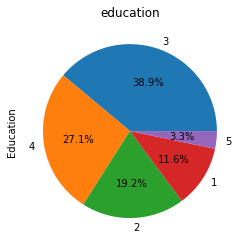

In [18]:
df.Education.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('education')

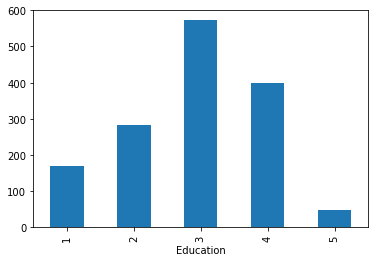

In [19]:
df.groupby(['Education'])['Attrition'].count().plot(kind = 'bar')

Employees with Bachelors degree have highest attrition rate followed by employees with Masters degree

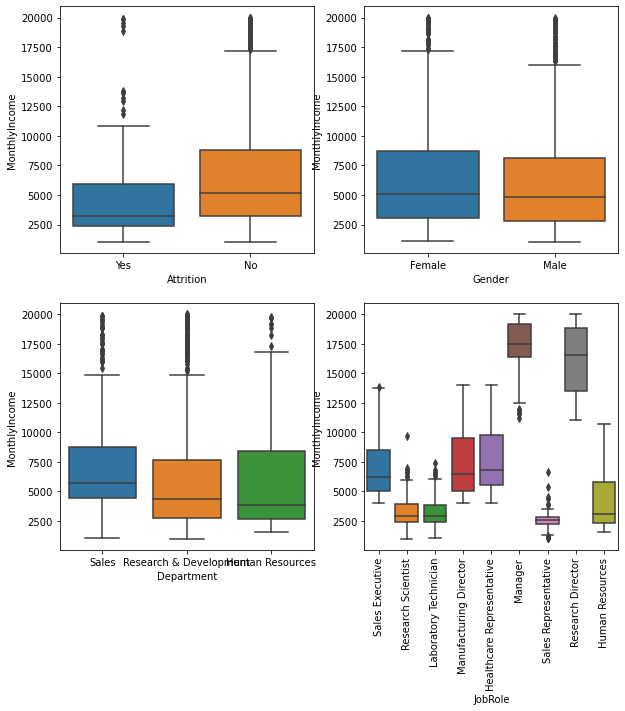

In [20]:
fig,ax = plt.subplots(2,2, figsize=(10,10))                       
sns.boxplot(df['Attrition'], df['MonthlyIncome'], ax = ax[0,0])  # Plot on 1st axes 
sns.boxplot(df['Gender'], df['MonthlyIncome'], ax = ax[0,1])  # Plot on 2nd axes
plt.xticks( rotation=90)
sns.boxplot(df['Department'], df['MonthlyIncome'], ax = ax[1,0])       # Plot on 3rd axes
plt.xticks( rotation=90)
sns.boxplot(df['JobRole'], df['MonthlyIncome'], ax = ax[1,1])     # Plot on 4 the axes
plt.show() 

the above plots represent the relation between monthly income and 
- attrition
- gender
- Department
- job role

In [21]:
#Removing unwanted columns columns
df = df.drop('StandardHours', axis = 1) 
df = df.drop('EmployeeCount', axis = 1)
df = df.drop('EmployeeNumber', axis = 1) 
df = df.drop('Over18', axis = 1) 

In [22]:
#Transform non-numeric columns into numerical columns
from sklearn.preprocessing import LabelEncoder## label encoder
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,2,1,...,0,2,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,3,1,...,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,1,1,...,1,1,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,3,1,...,0,3,0,17,3,1,9,6,0,8


### correlation

In [23]:
#Getting  the correlation of the columns
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010557,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680409,-0.019621,-0.021490,0.309796,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056605,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171571,-0.059478,-0.063939,-0.136932,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004103,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034144,0.015240,-0.011256,-0.014720,-0.011497,-0.032591,-0.022636
DailyRate,0.010557,-0.056605,-0.004103,1.000000,0.007796,-0.004738,-0.016550,0.038129,0.018462,-0.011194,...,0.000633,0.008530,0.041786,0.014877,0.002227,-0.037791,-0.032461,0.010997,-0.033431,-0.025849
Department,-0.031882,0.063991,-0.009044,0.007796,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015685,0.036875,0.026383,0.023308,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004738,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004560,-0.036942,-0.026556,0.009038,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016550,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148188,-0.025100,0.009819,0.067737,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.038129,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027833,0.049195,0.041191,-0.018987,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018462,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002900,-0.019359,0.027627,0.000657,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011194,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046875,-0.038787,-0.002753,-0.030797,-0.041483,-0.026985,-0.030599


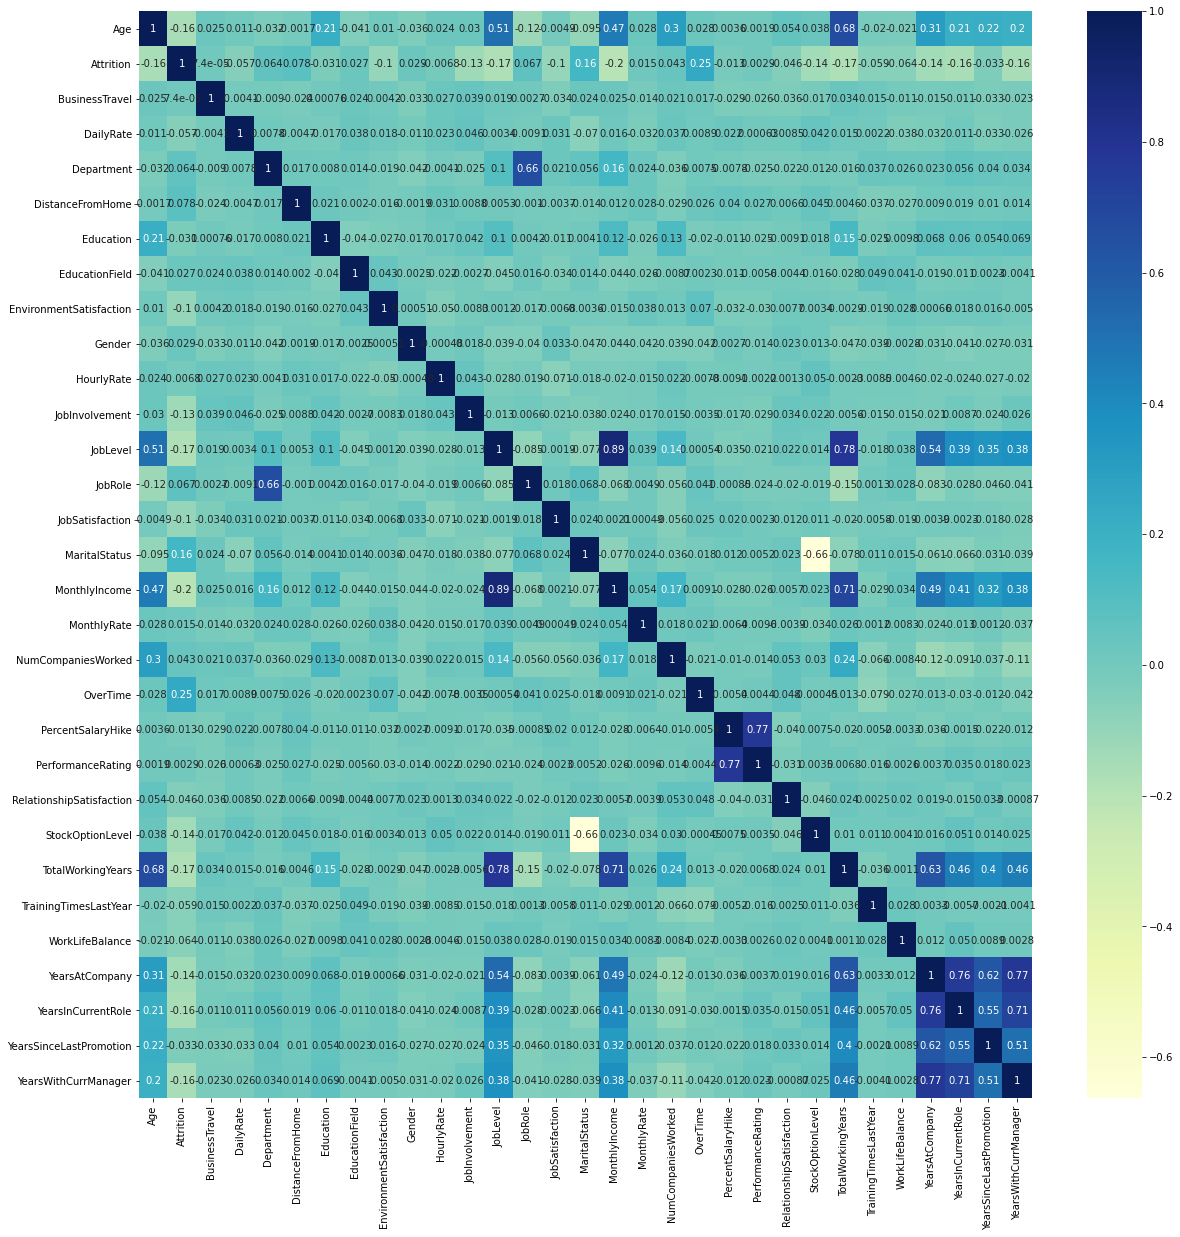

In [24]:
## visualizing correlation using heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')





- SMOTE to oversample due to the skewness in target
- Since we have already noted the severe imbalance in the values within the target variable,implementing the SMOTE method in the dealing with this skewed value via the imblearn Python package

In [25]:
from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=100)
X,y=smk.fit_sample(df.drop(['Attrition'],axis=1),df['Attrition'])


In [26]:
y.value_counts()

1    1181
0    1181
Name: Attrition, dtype: int64

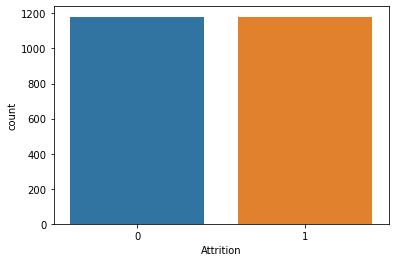

In [27]:
sns.countplot(y)

### Buliding the model


#### splitting  the data  into test and train


In [28]:
# Split the dataset into 75% Training set and 25% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [29]:
#printing the shapes of train and test data respectively
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1771, 30)
(591, 30)
(1771,)
(591,)


###  random forest algorithm

In [30]:
#Using Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',random_state=0)## creating object for class
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [31]:
y_pred_train=rfc.predict(X_train)

In [32]:
rfc.score(X_train, y_train)## train value 

0.9920948616600791

In [33]:
y_pred_test = rfc.predict(X_test)

In [34]:
#Showing  the confusion matrix and accuracy for  the model on the test data
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test)
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(cm)
result=((TP + TN) / (TP + TN + FN + FP))
print('Model testing accuracy=',result)

[[263  30]
 [ 36 262]]
Model testing accuracy= 0.8883248730964467


In [35]:
print(accuracy_score(y_test,y_pred_test))## test value
confusion_matrix(y_test, y_pred_test)

0.8883248730964467


array([[263,  30],
       [ 36, 262]], dtype=int64)

In [36]:
print(classification_report(y_test,y_pred_test))


              precision    recall  f1-score   support

           0       0.88      0.90      0.89       293
           1       0.90      0.88      0.89       298

    accuracy                           0.89       591
   macro avg       0.89      0.89      0.89       591
weighted avg       0.89      0.89      0.89       591



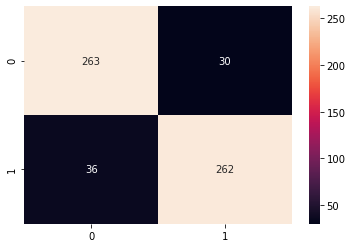

In [37]:
sns.heatmap(confusion_matrix(y_test,y_pred_test), annot=True, fmt='d') ## visual representation of confusion matrix


## Logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()## creating object
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)

C:\anaconda\Nishita Monica\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
accuracy_score(y_train, y_train_pred)## train data

0.7221908526256352

In [40]:
lr.fit(X_test, y_test)
y_test_pred = lr.predict(X_test)


C:\anaconda\Nishita Monica\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
print(accuracy_score(y_test, y_test_pred))## test value
confusion_matrix(y_test, y_test_pred)

0.7411167512690355


array([[224,  69],
       [ 84, 214]], dtype=int64)

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       293
           1       0.76      0.72      0.74       298

    accuracy                           0.74       591
   macro avg       0.74      0.74      0.74       591
weighted avg       0.74      0.74      0.74       591



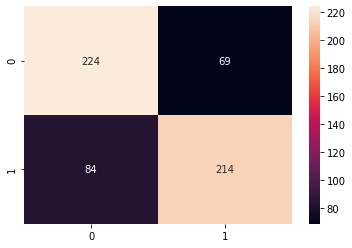

In [58]:
print(classification_report(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test,y_test_pred),fmt='d', annot=True)## visual representation of confusion matrix

## Naive bayes implementation

In [43]:
from sklearn.naive_bayes import GaussianNB
gn = GaussianNB() ## creating object
gn.fit(X_train, y_train)
train_Pred = gn.predict(X_train)

In [44]:
confusion_matrix(y_train,train_Pred)


array([[599, 289],
       [182, 701]], dtype=int64)

In [45]:
accuracy_score(y_train,train_Pred)## train value

0.7340485601355167

In [46]:
test_Pred = gn.predict(X_test)

In [47]:
confusion_matrix(y_test,test_Pred)
print(classification_report(y_test,test_Pred))

              precision    recall  f1-score   support

           0       0.79      0.69      0.73       293
           1       0.73      0.82      0.77       298

    accuracy                           0.75       591
   macro avg       0.76      0.75      0.75       591
weighted avg       0.76      0.75      0.75       591



In [48]:
accuracy_score(y_test,test_Pred) # test value

0.7529610829103215

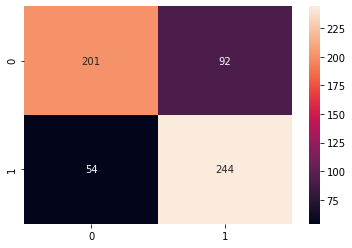

In [57]:
sns.heatmap(confusion_matrix(y_test,test_Pred), annot=True,fmt='d')## visual representation of  confusion matrix

### Random forest has the highest accuracy
- Since we got highest accuracy_score for Random Forest Boost, we will consider this for further analysis

Text(0.5, 1.0, 'accuracy of random forest vs logistic regression vs naive bayes')

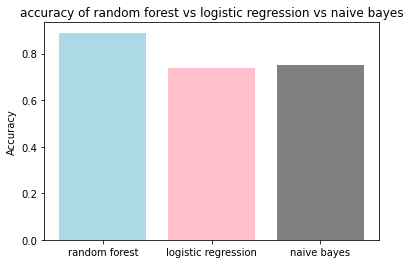

In [50]:
models=['random forest','logistic regression','naive bayes']
accuracy=[0.89,0.74,0.75]
plt.bar(models,accuracy,color=['lightblue','pink','grey'])
plt.ylabel('Accuracy')
plt.title('accuracy of random forest vs logistic regression vs naive bayes' )

### Tuning the parameters using GridSearchCV

In [51]:
from sklearn.model_selection import GridSearchCV ## importing the package
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rfc, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)

In [52]:
bestF = gridF.fit(X_train, y_train)
y_pred_f = bestF.predict(X_test)
print(classification_report(y_test, y_pred_f))
bestF.best_params_


Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 26.8min finished


              precision    recall  f1-score   support

           0       0.94      0.90      0.92       293
           1       0.91      0.94      0.92       298

    accuracy                           0.92       591
   macro avg       0.92      0.92      0.92       591
weighted avg       0.92      0.92      0.92       591



{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [54]:
accuracy_score(y_test, y_pred_f) ## test score

0.922165820642978

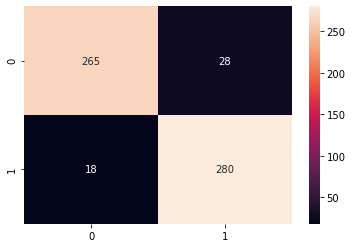

In [53]:
sns.heatmap(confusion_matrix(y_test,y_pred_f), annot=True, fmt='d') ## visual representation of classification report

In [55]:
## boosting the algorithm
from sklearn.ensemble import AdaBoostClassifier
rf = RandomForestClassifier(max_depth= 25, min_samples_leaf= 1, min_samples_split= 2, n_estimators = 500)
rf_Boost = AdaBoostClassifier(base_estimator=rf,n_estimators=100,learning_rate=0.01,random_state=1)
bestrfb = rf_Boost.fit(X_train, y_train)
y_pred_rfb = bestrfb.predict(X_test)
accuracy_score(y_test, y_pred_rfb)

0.9272419627749577

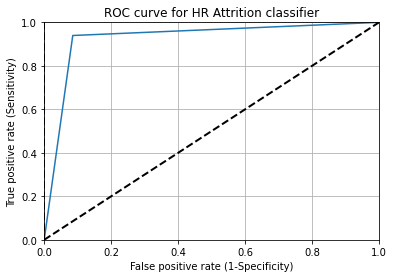

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score# importing  the packages
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rfb)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'k--', lw=2) 
plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')### printing the diagonal line for better visualization
plt.title('ROC curve for HR Attrition classifier')## title
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [60]:
roc_auc_score(y_test, y_pred_rfb)

0.9271365416771651

- accuracy befor hyper parameter tuning of random forest algorithm=88%
- accuracy after hyper parameter tuning of random forest algorithm=92%

Both **adaboost classifier** and the **hyper parameter tuning** gave the same accuracy score which is `92%`